<a href="https://colab.research.google.com/github/PedrovModa/Projeto-An-lise-de-Sal-rios/blob/main/Projeto_An%C3%A1lise_de_Sal%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando todas as bibliotecas que serão utilizadas.

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Tratamento do DATASET

#### Importando meu dataset

In [217]:
dados = pd.read_csv('ds_salaries.csv', index_col = 0)

#### Fazendo um trabalho de renomeação das minhas colunas com a tradução, para que dessa forma facilite a análise e exploração dos dados.

In [218]:
dados.rename(columns = {'work_year': 'Ano Trabalhado', 'experience_level': 'Nível de Experiência', 'employment_type': 'Tipo de Emprego',
             'job_title': 'Cargo', 'salary': 'Valor Salário/Ano', 'salary_currency': 'Recebe em', 'salary_in_usd': 'Salário em Dolar/Ano',
             'employee_residence': 'Local de Residencia', 'remote_ratio': 'Forma de Trabalho', 'company_location': 'Local do trabalho',
             'company_size': 'Tamanho da Empresa'}, inplace = True)

In [219]:
dados.head()

,Ano Trabalhado,Nível de Experiência,Tipo de Emprego,Cargo,Valor Salário/Ano,Recebe em,Salário em Dolar/Ano,Local de Residencia,Forma de Trabalho,Local do trabalho,Tamanho da Empresa
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### Fazendo uma rápida análise estatística em busca de possíveis Outliers

In [220]:
dados.describe()

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Forma de Trabalho
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Verificando a existência de dados nulos

In [221]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Ano Trabalhado        607 non-null    int64 
 1   Nível de Experiência  607 non-null    object
 2   Tipo de Emprego       607 non-null    object
 3   Cargo                 607 non-null    object
 4   Valor Salário/Ano     607 non-null    int64 
 5   Recebe em             607 non-null    object
 6   Salário em Dolar/Ano  607 non-null    int64 
 7   Local de Residencia   607 non-null    object
 8   Forma de Trabalho     607 non-null    int64 
 9   Local do trabalho     607 non-null    object
 10  Tamanho da Empresa    607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [222]:
dados.isnull().sum()

Ano Trabalhado          0
Nível de Experiência    0
Tipo de Emprego         0
Cargo                   0
Valor Salário/Ano       0
Recebe em               0
Salário em Dolar/Ano    0
Local de Residencia     0
Forma de Trabalho       0
Local do trabalho       0
Tamanho da Empresa      0
dtype: int64

#### Tratando o tipo das tabelas de salário para o tipo correto.

In [223]:
dados['Valor Salário/Ano'] = dados['Valor Salário/Ano'].astype(float)

In [224]:
dados['Salário em Dolar/Ano'] = dados['Salário em Dolar/Ano'].astype(float)

#### Criando coluna salário real, onde estamos convertendo Dólar em Real, seguindo o valor atualizado do dia 07/08/2022.

In [225]:
dados['Salário Real/Ano'] = dados['Salário em Dolar/Ano'] * 5.16

In [226]:
dados['Salário Real/Mês'] = (dados['Salário Real/Ano'] / 12).round(2)

#### Verificando quantos valores existem dentro da coluna [nível de experiência] para que possamos traduzir os valores dentro da coluna.

> Bloco com recuo



In [227]:
dados['Nível de Experiência'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [228]:
filtro_experiencia = {'EN': 'Estagiário', 'MI': 'Junior', 'SE': 'Sênior', 'EX': 'Expert'}

In [229]:
dados['Nível de Experiência'].replace(filtro_experiencia, inplace = True)

In [230]:
dados.head()

,Ano Trabalhado,Nível de Experiência,Tipo de Emprego,Cargo,Valor Salário/Ano,Recebe em,Salário em Dolar/Ano,Local de Residencia,Forma de Trabalho,Local do trabalho,Tamanho da Empresa,Salário Real/Ano,Salário Real/Mês
0,2020,Junior,FT,Data Scientist,70000.0,EUR,79833.0,DE,0,DE,L,411938.28,34328.19
1,2020,Sênior,FT,Machine Learning Scientist,260000.0,USD,260000.0,JP,0,JP,S,1341600.00,111800.00
2,2020,Sênior,FT,Big Data Engineer,85000.0,GBP,109024.0,GB,50,GB,M,562563.84,46880.32
3,2020,Junior,FT,Product Data Analyst,20000.0,USD,20000.0,HN,0,HN,S,103200.00,8600.00
4,2020,Sênior,FT,Machine Learning Engineer,150000.0,USD,150000.0,US,50,US,L,774000.00,64500.00


#### Verificando quantos valores existem dentro da coluna [tipo de emprego] para que possamos traduzir os valores dentro da coluna.

In [231]:
dados['Tipo de Emprego'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [232]:
filtro_emprego = {'PT': 'Meio-Período', 'FT': 'Dia todo', 'CT': 'Contrato', 'FL': 'Freelancer'}
dados['Tipo de Emprego'].replace(filtro_emprego, inplace = True)

#### Verificando quantos valores existem dentro da coluna [Cargo] para que possamos traduzir os valores dentro da coluna.

In [233]:
dados['Cargo'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [234]:
filtro_cargos = {'Data Scientist': 'Cientista de Dados', 'Machine Learning Scientist': 'Cientista de ML', 'Big Data Engineer': 'Engenheiro de Big Data',
                 'Product Data Analyst': 'Analista de Dados do Produto', 'Machine Learning Engineer': 'Engenheiro de ML', 'Data Analyst': 'Analista de dados',
                 'Lead Data Scientist': 'Cientista de Dados Líder', 'Business Data Analyst': 'Analista de Dados de Negócios', 'Lead Data Engineer': 'Engenheiro de Dados Líder',
                 'Lead Data Analyst': 'Lider de Análise de Dados', 'Data Engineer': 'Engenheiro de dados', 'Data Science Consultant': 'Consultor de Ciência de Dados', 'BI Data Analyst': 'Analista de Dados de BI',
                 'Director of Data Science': 'Diretor de Ciência de Dados', 'Research Scientist': 'Cientista de Pesquisa', 'Machine Learning Manager': 'Gerente de Machine Learning',
                 'Data Engineering Manager': 'Gerente de Engenharia de Dados','Machine Learning Infrastructure Engineer': 'Engenheiro de infraestrutura de ML', 'ML Engineer': 'Engenheiro de ML',
                 'AI Scientist': 'Cientista de IA', 'Computer Vision Engineer': 'Engenheiro de visão computacional', 'Principal Data Scientist': 'Cientista de Dados Principal', 'Data Science Manager': 'Gerente de Ciência de Dados',
                 'Head of Data': 'Chefe de Dados', '3D Computer Vision Researcher': 'Pesquisador de Visão Computacional 3D',
                 'Data Analytics Engineer': 'Engenheiro de Análise de Dados', 'Applied Data Scientist': 'Cientista de Dados Aplicados', 'Marketing Data Analyst': 'Analista de Dados de Marketing', 'Cloud Data Engineer':  'Engenheiro de Dados em Cloud',
                 'Financial Data Analyst': 'Analista de Dados Financeiros', 'Computer Vision Software Engineer': 'Engenheiro de Software de Visão Computacional', 'Director of Data Engineering': 'Diretor de Engenharia de Dados', 'Data Science Engineer': 'Engenheiro de Ciência de Dados',
                 'Principal Data Engineer': 'Engenheiro de Dados Principal','Machine Learning Developer': 'Desenvolvedor de Machine Learning', 'Applied Machine Learning Scientist': 'Cientista de ML aplicado', 'Data Analytics Manager': 'Gerente de Análise de Dados', 'Head of Data Science': 'Chefe de Ciência de Dados',
                 'Data Specialist': 'Especialista de Dados', 'Data Architect':'Arquiteto de Dados', 'Finance Data Analyst': 'Analista de dados financeiros', 'Principal Data Analyst': 'Analista de dados principal','Big Data Architect': 'Arquiteto de Big Data', 'Staff Data Scientist': 'Staff de Cientista de Dados', 'Analytics Engineer': 'Engenheiro Analítico',
                 'ETL Developer': 'Desenvolvedor ETL', 'Head of Machine Learning': 'Chefe de ML', 'NLP Engineer': 'Engenheiro de PNL',
                 'Lead Machine Learning Engineer': 'Lider de Engenharia de ML', 'Data Analytics Lead': 'Líder de análise de dados' }

dados['Cargo'].replace(filtro_cargos, inplace = True)

#### Verificando quantos valores existem dentro da coluna [Recebe em] para que possamos traduzir os valores dentro da coluna.

In [235]:
dados['Recebe em'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [236]:
filtro_moedas = {'EUR': 'Euro', 'USD': 'Dólar Americano', 'GBP': 'Libra Inglesa', 'HUF': 'Florim Húngaro', 'INR': 'Rupia Indiana', 'JPY': 'Iêne Japônes', 'CNY': 'Renminbi',
                 'MXN': 'Peso Mexicano', 'CAD': 'Dólar Canadense', 'DKK': 'Coroa Dinamarquesa', 'PLN':'Zloty Polonês', 'SGD': 'Dólar Singapuriano',
                 'CLP':'Peso Chileno', 'BRL': 'Real', 'TRY': 'Lira Turca', 'AUD': 'Dólar Australiano', 'CHF': 'Franco Suiço'}

dados.replace(filtro_moedas, inplace = True)

#### Verificando quantos valores existem dentro da coluna [Local de residencia] para que possamos traduzir os valores dentro da coluna.

In [237]:
dados['Local de Residencia'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [238]:
filtro_residencia = {'DE':'Alemanha', 'JP':'Japão', 'GB':'Reino Unido','HN':'Honduras','HU':'Hungria','US':'Estados Unidos','NZ':'Nova Zelândia','FR':'França',
                     'IN':'India','CN':'China','PK':'Paquistão','GR':'Grécia','AE':'Emirados Árabes','NL':'Holanda','MX':'México','CA':'Canadá',
                     'AT':'Áustria','NG':'Nigéria','PH':'Philipinas','ES':'Espanha','DK':'Dinamarca','RU':'Federação Russa','IT':'Itália','HR':'Croácia',
                     'LU':'Luxemburgo','PL':'Polônia','SG':'Singapura','RO':'Romênia','IQ':'Iraque','BR':'Brasil','BE':'Bélgica','UA':'Ucrânia','IL':'Israel',
                     'MT':'Malta','CL':'Chile','IR':'Irã','CO':'Colombia','MD':'Republica da Moldolva','KE':'Quênia','SI':'Eslovênia','CH':'Suiça',
                     'VN':'Vietnã','AS':'Samoa Americana','TR':'Turquia','CZ':'República Tcheca','DZ':'Argélia','EE':'Estônia','MY':'Malásia','AU':'Austrália',
                     'IE':'Irlanda','PT':'Portugal'}
dados['Local de Residencia'].replace(filtro_residencia, inplace = True)

#### Verificando quantos valores existem dentro da coluna [Forma de trabalho] para que possamos traduzir os valores dentro da coluna.

In [239]:
dados['Forma de Trabalho'].unique()

array([  0,  50, 100])

In [240]:
filtro_trabalho_remoto = {0:'Presencial', 50:'Híbrido', 100: 'Presencial'}
dados['Forma de Trabalho'].replace(filtro_trabalho_remoto, inplace = True)

#### Verificando quantos valores existem dentro da coluna [Local de trabalho] para que possamos traduzir os valores dentro da coluna.

In [241]:
dados['Local do trabalho'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [242]:
dados['Local do trabalho'].replace(filtro_residencia, inplace = True)

In [243]:
filtro_tamanho = {'S':'Pequena', 'M':'Média', 'L':'Grande'}
dados.replace(filtro_tamanho, inplace = True)

## Análise exploratória

In [244]:
dados.describe()

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
count,607.000000,6.070000e+02,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852,5.794570e+05,48288.084036
std,0.692133,1.544357e+06,70957.259411,3.661395e+05,30511.621547
min,2020.000000,4.000000e+03,2859.000000,1.475244e+04,1229.370000
25%,2021.000000,7.000000e+04,62726.000000,3.236662e+05,26972.180000
50%,2022.000000,1.150000e+05,101570.000000,5.241012e+05,43675.100000
75%,2022.000000,1.650000e+05,150000.000000,7.740000e+05,64500.000000
max,2022.000000,3.040000e+07,600000.000000,3.096000e+06,258000.000000


### Analisando a distribuição dos trabalhadores nas duas formas de trabalho e além disso, verificando se possui algum Outlier em relação ao valor de salário.

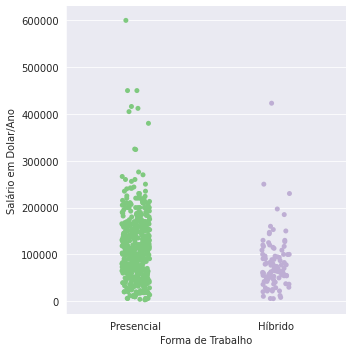

In [245]:
sns.catplot(x='Forma de Trabalho', y = 'Salário em Dolar/Ano', data = dados)

In [246]:
### A partir do gráfico acima, podemos afirmar que a forma de trabalho Presencial se destaca em comparação ao método híbrido. Considerando que o Dataset é referente aos anos de 2020, 2021 e 2022,
### esses dados assustam um pouco, uma vez que durante esse período ocorreu/está ocorrendo uma pandemia global de combate ao COVID-19.
### Outra coisa que pode ser observada são dois Outliers presentes, um na forma de trabalho presencial e outro Híbrido, vamos descobrir se são Outliers mesmo.

In [247]:
dados[(dados['Forma de Trabalho'] == 'Presencial') & (dados['Salário em Dolar/Ano'] > 400000)].sort_values(by= 'Salário em Dolar/Ano')

,Ano Trabalhado,Nível de Experiência,Tipo de Emprego,Cargo,Valor Salário/Ano,Recebe em,Salário em Dolar/Ano,Local de Residencia,Forma de Trabalho,Local do trabalho,Tamanho da Empresa,Salário Real/Ano,Salário Real/Mês
523,2022,Sênior,Dia todo,Líder de análise de dados,405000.0,Dólar Americano,405000.0,Estados Unidos,Presencial,Estados Unidos,Grande,2089800.0,174150.0
63,2020,Sênior,Dia todo,Cientista de Dados,412000.0,Dólar Americano,412000.0,Estados Unidos,Presencial,Estados Unidos,Grande,2125920.0,177160.0
225,2021,Expert,Contrato,Cientista de Dados Principal,416000.0,Dólar Americano,416000.0,Estados Unidos,Presencial,Estados Unidos,Pequena,2146560.0,178880.0
33,2020,Junior,Dia todo,Cientista de Pesquisa,450000.0,Dólar Americano,450000.0,Estados Unidos,Presencial,Estados Unidos,Média,2322000.0,193500.0
97,2021,Junior,Dia todo,Analista de Dados Financeiros,450000.0,Dólar Americano,450000.0,Estados Unidos,Presencial,Estados Unidos,Grande,2322000.0,193500.0
252,2021,Expert,Dia todo,Engenheiro de Dados Principal,600000.0,Dólar Americano,600000.0,Estados Unidos,Presencial,Estados Unidos,Grande,3096000.0,258000.0


In [248]:
dados[(dados['Nível de Experiência'] == 'Expert') & (dados['Cargo'] == 'Engenheiro de Dados Principal')]

,Ano Trabalhado,Nível de Experiência,Tipo de Emprego,Cargo,Valor Salário/Ano,Recebe em,Salário em Dolar/Ano,Local de Residencia,Forma de Trabalho,Local do trabalho,Tamanho da Empresa,Salário Real/Ano,Salário Real/Mês
252,2021,Expert,Dia todo,Engenheiro de Dados Principal,600000.0,Dólar Americano,600000.0,Estados Unidos,Presencial,Estados Unidos,Grande,3096000.0,258000.0


In [249]:
### Através dessa consulta, podemos ver que o possível Outlier encontrado na forma de trabalho Presencial, não se trata de um Outlier e sim de um dado real, considerando que seu cargo
### é Engenheiro de Dados Principal e seu nível de experiência é Expert, além disso trabalha em uma empresa de Tamanho grande.
### Além de tudo, podemos ver que ele é o único profissional com esse nível de Serionidade, o que gera muita procura de seu trabalho e consequentemente altos valores em salário são oferecidos.

In [250]:
dados[(dados['Forma de Trabalho'] == 'Híbrido') & (dados['Salário em Dolar/Ano'] > 200000)].sort_values(by= 'Salário em Dolar/Ano')

,Ano Trabalhado,Nível de Experiência,Tipo de Emprego,Cargo,Valor Salário/Ano,Recebe em,Salário em Dolar/Ano,Local de Residencia,Forma de Trabalho,Local do trabalho,Tamanho da Empresa,Salário Real/Ano,Salário Real/Mês
160,2021,Expert,Dia todo,Chefe de Dados,230000.0,Dólar Americano,230000.0,Federação Russa,Híbrido,Federação Russa,Grande,1186800.0,98900.0
37,2020,Estagiário,Dia todo,Engenheiro de ML,250000.0,Dólar Americano,250000.0,Estados Unidos,Híbrido,Estados Unidos,Grande,1290000.0,107500.0
157,2021,Junior,Dia todo,Cientista de ML aplicado,423000.0,Dólar Americano,423000.0,Estados Unidos,Híbrido,Estados Unidos,Grande,2182680.0,181890.0


In [251]:
### Já nesse caso, o possível Outlier encontrado na forma de trabalho Híbrido, podemos constatar que é de fato um Outlier. 
### Isso é justificado pelo seu nível de experiência... 'Junior'. Ele está ganhando quase o dobro que um Expert. Portanto, iremos excluir essa linha por se tratar de um Outlier.

#### Excluindo Outlier

In [252]:
filtro_outlier = dados[(dados['Forma de Trabalho'] == 'Híbrido') & (dados['Salário em Dolar/Ano'] > 400000)].sort_values(by= 'Salário em Dolar/Ano').index

In [253]:
dados.drop(filtro_outlier, axis = 0, inplace = True)

In [254]:
dados[(dados['Forma de Trabalho'] == 'Híbrido') & (dados['Salário em Dolar/Ano'] > 200000)].sort_values(by= 'Salário em Dolar/Ano')

,Ano Trabalhado,Nível de Experiência,Tipo de Emprego,Cargo,Valor Salário/Ano,Recebe em,Salário em Dolar/Ano,Local de Residencia,Forma de Trabalho,Local do trabalho,Tamanho da Empresa,Salário Real/Ano,Salário Real/Mês
160,2021,Expert,Dia todo,Chefe de Dados,230000.0,Dólar Americano,230000.0,Federação Russa,Híbrido,Federação Russa,Grande,1186800.0,98900.0
37,2020,Estagiário,Dia todo,Engenheiro de ML,250000.0,Dólar Americano,250000.0,Estados Unidos,Híbrido,Estados Unidos,Grande,1290000.0,107500.0


### Realizando análises estatísticas das diferentes formas de trabalho

In [255]:
dados[dados['Forma de Trabalho'] == 'Presencial'].describe().round(2)

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
count,508.00,508.00,508.00,508.00,508.00
mean,2021.50,249161.89,118431.75,611107.81,50925.65
std,0.67,1401173.50,71771.35,370340.16,30861.68
min,2020.00,4000.00,2859.00,14752.44,1229.37
25%,2021.00,75000.00,69935.25,360865.89,30072.16
50%,2022.00,120000.00,110268.50,568985.46,47415.46
75%,2022.00,165265.00,155400.00,801864.00,66822.00
max,2022.00,30400000.00,600000.00,3096000.00,258000.00


In [256]:
dados[dados['Forma de Trabalho'] == 'Híbrido'].describe().round(2)

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
count,98.00,98.00,98.00,98.00,98.00
mean,2020.91,710926.52,77331.43,399030.17,33252.51
std,0.58,2111385.18,45868.39,236680.87,19723.41
min,2020.00,8000.00,5409.00,27910.44,2325.87
25%,2021.00,52125.00,50000.50,258002.58,21500.22
50%,2021.00,76760.00,68010.50,350934.18,29244.52
75%,2021.00,149250.00,98847.75,510054.39,42504.53
max,2022.00,11000000.00,250000.00,1290000.00,107500.00


### Realizando análises estatísticas dos diferentes níveis de experiência.

In [257]:
dados[dados['Nível de Experiência']== 'Estagiário'].describe().round(2)

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
count,88.00,88.00,88.00,88.00,88.00
mean,2021.01,264622.45,61643.32,318079.52,26506.63
std,0.69,650985.71,44395.54,229080.99,19090.08
min,2020.00,4000.00,4000.00,20640.00,1720.00
25%,2021.00,41500.00,27505.00,141925.80,11827.15
50%,2021.00,68500.00,56500.00,291540.00,24295.00
75%,2021.00,108750.00,85425.75,440796.87,36733.07
max,2022.00,4450000.00,250000.00,1290000.00,107500.00


In [258]:
dados[dados['Nível de Experiência']== 'Junior'].describe().round(2)

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
count,212.00,212.00,212.00,212.00,212.00
mean,2021.28,480889.47,86415.85,445905.78,37158.82
std,0.71,2454681.67,59735.28,308234.06,25686.17
min,2020.00,4000.00,2859.00,14752.44,1229.37
25%,2021.00,53000.00,47820.50,246753.78,20562.81
50%,2021.00,83950.00,76940.00,397010.40,33084.20
75%,2022.00,135000.00,111831.25,577049.25,48087.44
max,2022.00,30400000.00,450000.00,2322000.00,193500.00


In [259]:
dados[dados['Nível de Experiência']== 'Sênior'].describe().round(2)

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
count,280.00,280.00,280.00,280.00,280.00
mean,2021.62,213949.35,138617.29,715265.23,59605.44
std,0.60,584283.40,57691.98,297690.61,24807.55
min,2020.00,24000.00,18907.00,97560.12,8130.01
25%,2021.00,101377.50,100000.00,516000.00,43000.00
50%,2022.00,140000.00,135500.00,699180.00,58265.00
75%,2022.00,175025.00,170000.00,877200.00,73100.00
max,2022.00,7000000.00,412000.00,2125920.00,177160.00


In [260]:
dados[dados['Nível de Experiência']== 'Expert'].describe().round(2)

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
count,26.00,26.00,26.00,26.00,26.00
mean,2021.42,427072.12,199392.04,1028862.92,85738.58
std,0.64,1142629.61,117071.26,604087.68,50340.64
min,2020.00,59000.00,69741.00,359863.56,29988.63
25%,2021.00,130000.00,130006.50,670833.54,55902.80
50%,2021.50,187500.00,171437.50,884617.50,73718.12
75%,2022.00,248000.00,233750.00,1206150.00,100512.50
max,2022.00,6000000.00,600000.00,3096000.00,258000.00


### Verificando qual Cargo mais pagou no ano de 2020.

In [261]:
ano_2020 = dados[dados['Ano Trabalhado'] == 2020]

In [262]:
ano_2020_melhores_salarios = ano_2020.groupby('Cargo').mean().round(2).sort_values('Salário em Dolar/Ano', ascending = False)[0:3]

In [263]:
ano_2020_melhores_salarios

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
Cargo,,,,,
Diretor de Ciência de Dados,2020.0,325000.0,325000.0,1677000.0,139750.0
Cientista de ML,2020.0,260000.0,260000.0,1341600.0,111800.0
Cientista de Pesquisa,2020.0,246000.0,246000.0,1269360.0,105780.0


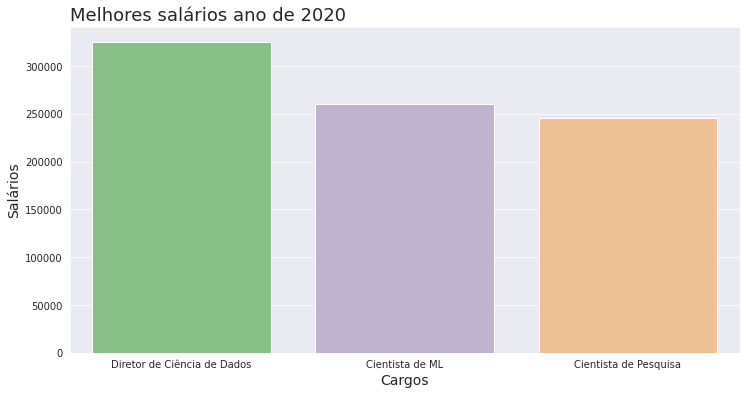

In [264]:
### Dando uma cor para a linha do meu gráfico
sns.set_palette('Accent')
### Passando o darkgrid para o meu gráfico (encruzilhado de linhas)
sns.set_style('darkgrid')
### Dando o comando para elaborar meu gráfico
ax = sns.barplot(x=ano_2020_melhores_salarios.index, y = 'Salário em Dolar/Ano', data = ano_2020_melhores_salarios)
### Ajustando o tamanho do meu gráfico
ax.figure.set_size_inches(12,6)
### Dando um título para meu gráfico
ax.set_title('Melhores salários ano de 2020', loc='left', fontsize = 18)
### Dando um ~Nome~ para o meu X
ax.set_xlabel('Cargos', fontsize = 14)
### Dando um ~Nome~ para meu Y
ax.set_ylabel('Salários', fontsize = 14)
### Removendo informaçoes que ficam acima do meu gráfico.
ax = ax

### Verificando qual Cargo mais pagou em Reais no ano de 2021.

In [265]:
ano_2021 = dados[dados['Ano Trabalhado'] == 2021]

In [266]:
ano_2021_melhores_salarios = ano_2021.groupby('Cargo').mean().round(2).sort_values('Salário em Dolar/Ano', ascending = False)[0:3]

In [267]:
ano_2021_melhores_salarios

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
Cargo,,,,,
Analista de Dados Financeiros,2021.0,450000.00,450000.00,2322000.00,193500.00
Engenheiro de Dados Principal,2021.0,328333.33,328333.33,1694200.00,141183.33
Cientista de Dados Principal,2021.0,233800.00,239152.40,1234026.38,102835.53


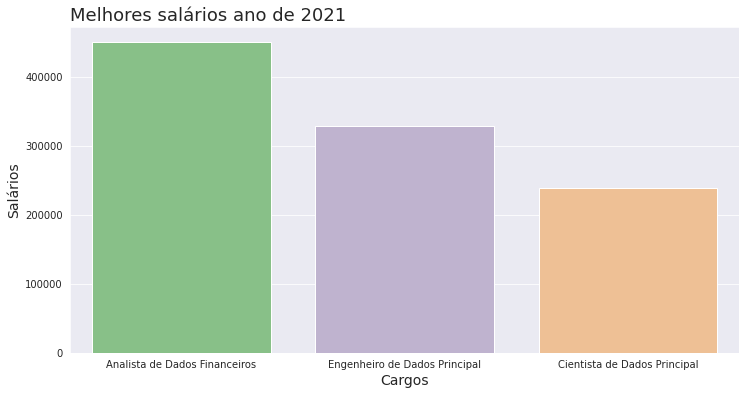

In [268]:
### Dando uma cor para a linha do meu gráfico
sns.set_palette('Accent')
### Passando o darkgrid para o meu gráfico (encruzilhado de linhas)
sns.set_style('darkgrid')
### Dando o comando para elaborar meu gráfico
ax = sns.barplot(x=ano_2021_melhores_salarios.index, y = 'Salário em Dolar/Ano', data = ano_2021_melhores_salarios)
### Ajustando o tamanho do meu gráfico
ax.figure.set_size_inches(12,6)
### Dando um título para meu gráfico
ax.set_title('Melhores salários ano de 2021', loc='left', fontsize = 18)
### Dando um ~Nome~ para o meu X
ax.set_xlabel('Cargos', fontsize = 14)
### Dando um ~Nome~ para meu Y
ax.set_ylabel('Salários', fontsize = 14)
### Removendo informaçoes que ficam acima do meu gráfico.
ax = ax

### Verificando qual Cargo mais pagou em Reais no ano de 2022.

In [269]:
ano_2022 = dados[dados['Ano Trabalhado'] == 2022]

In [270]:
ano_2022_melhores_salarios = ano_2022.groupby('Cargo').mean().round(2).sort_values('Salário em Dolar/Ano', ascending = False)[0:3]

In [271]:
ano_2022_melhores_salarios

,Ano Trabalhado,Valor Salário/Ano,Salário em Dolar/Ano,Salário Real/Ano,Salário Real/Mês
Cargo,,,,,
Líder de análise de dados,2022.0,405000.0,405000.0,2089800.00,174150.00
Cientista de Dados Aplicados,2022.0,238000.0,238000.0,1228080.00,102340.00
Diretor de Ciência de Dados,2022.0,250000.0,196979.0,1016411.64,84700.97


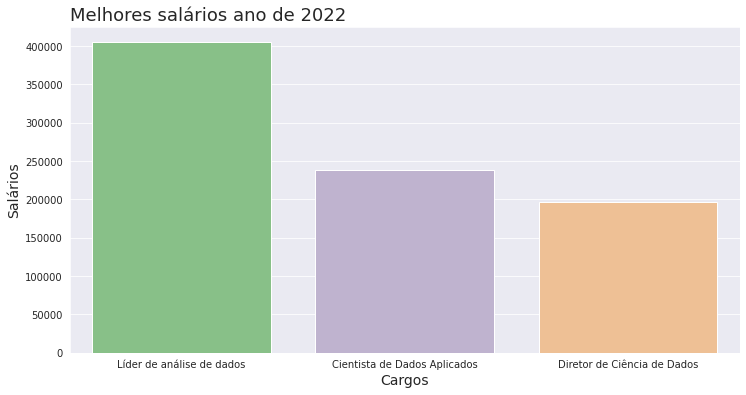

In [272]:
### Dando uma cor para a linha do meu gráfico
sns.set_palette('Accent')
### Passando o darkgrid para o meu gráfico (encruzilhado de linhas)
sns.set_style('darkgrid')
### Dando o comando para elaborar meu gráfico
ax = sns.barplot(x=ano_2022_melhores_salarios.index, y = 'Salário em Dolar/Ano', data = ano_2022_melhores_salarios)
### Ajustando o tamanho do meu gráfico
ax.figure.set_size_inches(12,6)
### Dando um título para meu gráfico
ax.set_title('Melhores salários ano de 2022', loc='left', fontsize = 18)
### Dando um ~Nome~ para o meu X
ax.set_xlabel('Cargos', fontsize = 14)
### Dando um ~Nome~ para meu Y
ax.set_ylabel('Salários', fontsize = 14)
### Removendo informaçoes que ficam acima do meu gráfico.
ax = ax

### Fazendo uma correlação entre meus dados

In [273]:
correlacao = dados.corr()

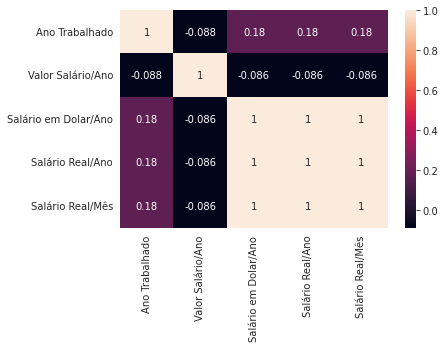

In [274]:

sns.heatmap(dados.corr(), xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True)

### Verificando qual é o cargo que mais esteve presente no meu dataset.

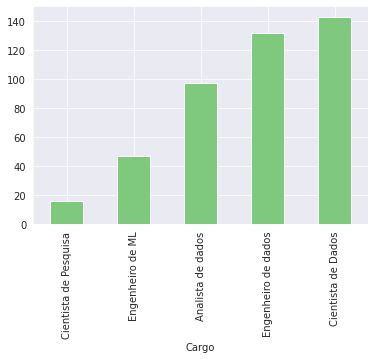

In [275]:
quantidade_cargos_geral = dados.groupby(['Cargo']).Cargo.count().sort_values()[-5:].plot(kind='bar')

### Analisando quais são os cargos com os melhores salários levando em consideração todos os anos.

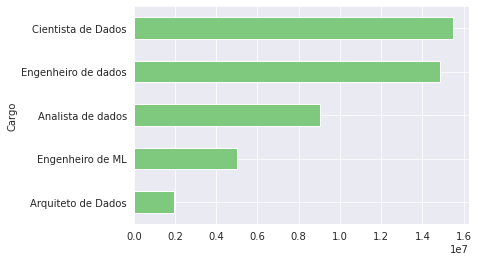

In [276]:
melhores_salarios_em_dolar_geral = dados.groupby(['Cargo'])['Salário em Dolar/Ano'].sum().sort_values()[-5:].plot(kind='barh')

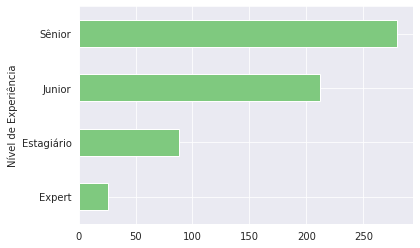

In [277]:
quantidade_senioridades_geral = dados.groupby(['Nível de Experiência'])['Salário em Dolar/Ano'].count().sort_values()[-5:].plot(kind='barh')